<a href="https://colab.research.google.com/github/akashkivani/almabetter-Email-Campaign-Effectiveness-Prediction-Project/blob/main/ML_Classification_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - Classification
##### **Contribution**    - Individual


# **Project Summary -**

Email Marketing can be defined as a marketing technique in which businesses stay connected with their customers through emails, making them aware about their new products, updates, important notices related to the products they are using.
My problem statement was to use different features of email like email campaign, past communications, etc (from provided data frame) and predict how the cx will response for email. The cx can neglect the email, read it or acknowledge the email. The more the cx acknowledge the email, the sucessful the campaign is. 
I recieved a data frame with the following column:

    Email Id - It contains the email id's of the customers/individuals
    Email Type - There are two categories 1 and 2. We can think of them as marketing emails or important updates, notices like emails regarding the business.
    Subject Hotness Score - It is the email's subject's score on the basis of how good and effective the content is.
    Email Source - It represents the source of the email like sales and marketing or important admin mails related to the product.
    Email Campaign Type - The campaign type of the email.
    Total Past Communications - This column contains the total previous mails from the same source, the number of communications had.
    Customer Location - Contains demographical data of the customer, the location where the customer resides.
    Time Email sent Category - It has three categories 1,2 and 3; the time of the day when the email was sent, we can think of it as morning, evening and night time slots.
    Word Count - The number of words contained in the email.
    Total links - Number of links in the email.
    Total Images - Number of images in the email.
    Email Status - Our target variable which contains whether the mail was ignored, read, acknowledged by the reader.

I started my analysis with checking null values, I filled them up with mean and mode according to it's distribution. During EDA, I also saw the distribution of email neglected, read and acknowledged w.r.t. different continous and categorical features(as mentioned above and in detail in colab). I also plotted detailed graph of distribution. 

Further, in next section, I analyzed the corelation between different different features. I also checked the VIF, used IQR stat technique to check outliers and did one-hot encoding before model building as this problem had a number of categorical variable. 

In the model building part, I checked that the data was highly embalanced. I used random undersampling and SMOTE technique to create different train data set for different model and checked the model scores for them individually. 
XGB performed the best, thus I accepted it final model. 

# **GitHub Link -**

https://github.com/akashkivani/almabetter-Email-Campaign-Effectiveness-Prediction-Project/blob/main/ML_Classification_Submission.ipynb

# **Problem Statement**


Most of the small to medium business owners are making effective use of Gmail-based
Email marketing Strategies for offline targeting of converting their prospective customers into
leads so that they stay with them in Business.
The main objective is to create a machine learning model to characterize the mail and track
the mail that is ignored; read; acknowledged by the reader.
Data columns are self-explanatory.


---


Email marketing allows businesses to build relationships with leads, new customers and past customers. It's a way to communicate directly to the customers in their inbox, at a time that is convenient for them. With the right messaging tone and strategies, emails are one of the most important marketing channels.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [319]:
# Import Libraries

import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams.update({'figure.figsize':(8,5),'figure.dpi':100})

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, roc_auc_score, f1_score, recall_score,roc_curve, classification_report

### Dataset Loading

In [320]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Data Science/AlmaBetter School/Capstone/Project 3/Data/data_email_campaign.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset First View

In [321]:
# Dataset First Look
df.head()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0


### Dataset Rows & Columns count

In [322]:
# Dataset Rows & Columns count

df.shape

(68353, 12)

In [323]:
df.columns

Index(['Email_ID', 'Email_Type', 'Subject_Hotness_Score', 'Email_Source_Type',
       'Customer_Location', 'Email_Campaign_Type', 'Total_Past_Communications',
       'Time_Email_sent_Category', 'Word_Count', 'Total_Links', 'Total_Images',
       'Email_Status'],
      dtype='object')

### Dataset Information

In [324]:
# Dataset Info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   68353 non-null  object 
 1   Email_Type                 68353 non-null  int64  
 2   Subject_Hotness_Score      68353 non-null  float64
 3   Email_Source_Type          68353 non-null  int64  
 4   Customer_Location          56758 non-null  object 
 5   Email_Campaign_Type        68353 non-null  int64  
 6   Total_Past_Communications  61528 non-null  float64
 7   Time_Email_sent_Category   68353 non-null  int64  
 8   Word_Count                 68353 non-null  int64  
 9   Total_Links                66152 non-null  float64
 10  Total_Images               66676 non-null  float64
 11  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 6.3+ MB


#### Duplicate Values

In [325]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [326]:
# Missing Values/Null Values Count
df.isnull().sum()

Email_ID                         0
Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications     6825
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                   2201
Total_Images                  1677
Email_Status                     0
dtype: int64

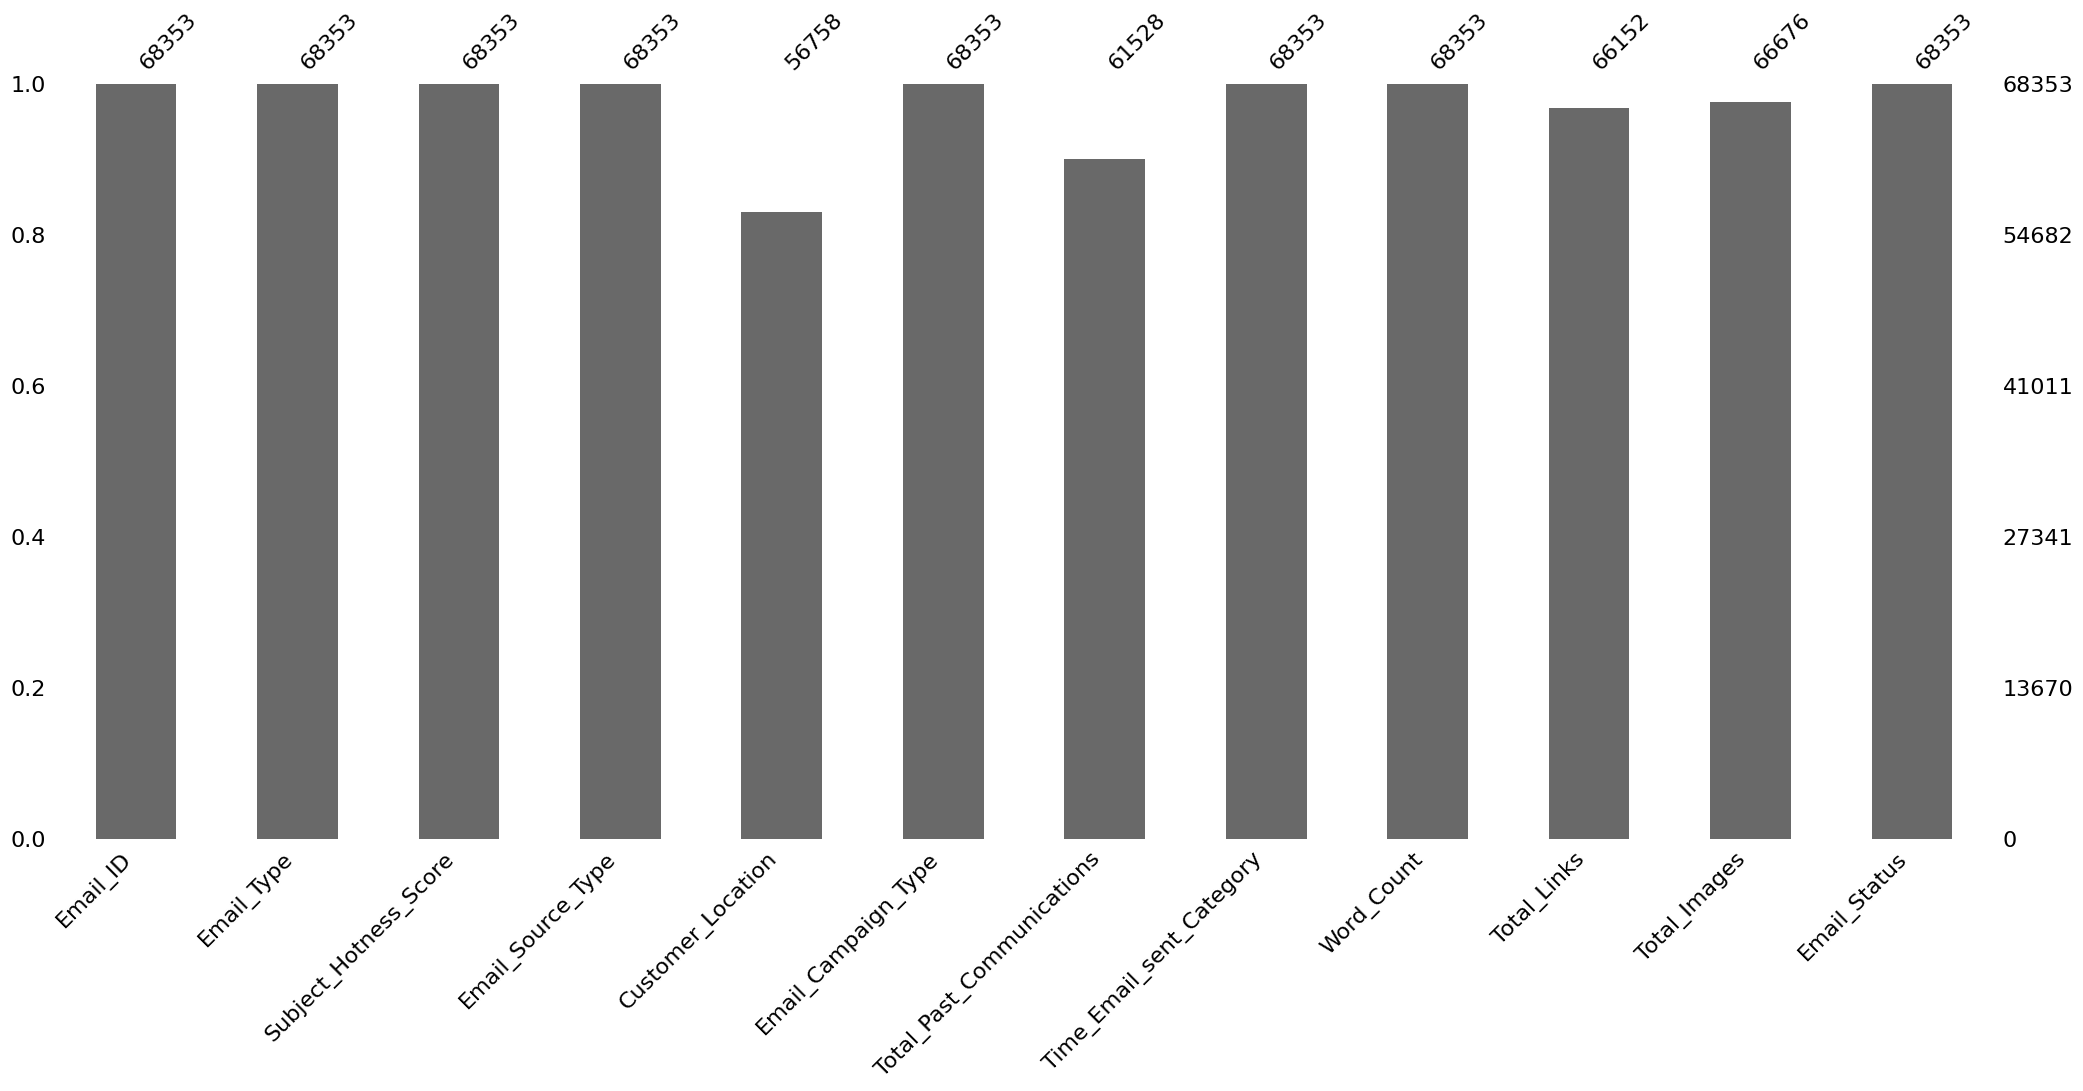

In [327]:
# Visualizing the missing values

import missingno as msno
msno.bar(df)

### What did you know about your dataset?

This data base contains details of different email where the company have target email marketing, and tracked report if the email was open, acknowledged or simply neglected. It also have some other information, like location, past communication, etc. in columns with details below in understanding variable section. 

Our email campaign dataset have 68353 observations and 12 features. Clearly Email_Status is our target variable.

It have no duplicates, but have a number of NAN if different columns which I will handle in later section.

## ***2. Understanding Your Variables***

In [328]:
# Dataset Columns
df.columns

Index(['Email_ID', 'Email_Type', 'Subject_Hotness_Score', 'Email_Source_Type',
       'Customer_Location', 'Email_Campaign_Type', 'Total_Past_Communications',
       'Time_Email_sent_Category', 'Word_Count', 'Total_Links', 'Total_Images',
       'Email_Status'],
      dtype='object')

In [329]:
# Dataset Describe
df.describe()

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
count,68353.000000,68353.000000,68353.000000,68353.000000,61528.000000,68353.000000,68353.000000,66152.000000,66676.000000,68353.000000
mean,1.285094,1.095481,1.456513,2.272234,28.933250,1.999298,699.931751,10.429526,3.550678,0.230934
std,0.451462,0.997578,0.498109,0.468680,12.536518,0.631103,271.719440,6.383270,5.596983,0.497032
min,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,40.000000,1.000000,0.000000,0.000000
25%,1.000000,0.200000,1.000000,2.000000,20.000000,2.000000,521.000000,6.000000,0.000000,0.000000
50%,1.000000,0.800000,1.000000,2.000000,28.000000,2.000000,694.000000,9.000000,0.000000,0.000000
75%,2.000000,1.800000,2.000000,3.000000,38.000000,2.000000,880.000000,14.000000,5.000000,0.000000
max,2.000000,5.000000,2.000000,3.000000,67.000000,3.000000,1316.000000,49.000000,45.000000,2.000000


### Variables Description 

**Email Id** - It contains the email id's of the customers/individuals

**Email Type** - There are two categories 1 and 2. We can think of them as marketing emails or important updates, notices like emails regarding the business.

**Subject Hotness Score** - It is the email's subject's score on the basis of how good and effective the content is.

**Email Source** - It represents the source of the email like sales and marketing or important admin mails related to the product.

**Email Campaign Type** - The campaign type of the email.

**Total Past Communications**- This column contains the total previous mails from the same source, the number of communications had.

**Customer Location**- Contains demographical data of the customer, the location where the customer resides.

**Time Email sent Category** - It has three categories 1,2 and 3; the time of the day when the email was sent, we can think of it as morning, evening and night time slots.

**Word Count** - The number of words contained in the email.

**Total links** - Number of links in the email.

**Total Images** - Number of images in the email.

**Email Status** - Our target variable which contains whether the mail was ignored, read, acknowledged by the reader.

### Check Unique Values for each variable.

In [330]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),".")

No. of unique values in  Email_ID is 68353 .
No. of unique values in  Email_Type is 2 .
No. of unique values in  Subject_Hotness_Score is 51 .
No. of unique values in  Email_Source_Type is 2 .
No. of unique values in  Customer_Location is 7 .
No. of unique values in  Email_Campaign_Type is 3 .
No. of unique values in  Total_Past_Communications is 64 .
No. of unique values in  Time_Email_sent_Category is 3 .
No. of unique values in  Word_Count is 151 .
No. of unique values in  Total_Links is 37 .
No. of unique values in  Total_Images is 45 .
No. of unique values in  Email_Status is 3 .


## 3. ***Data Wrangling***

### Data Wrangling Code

source: Internet.

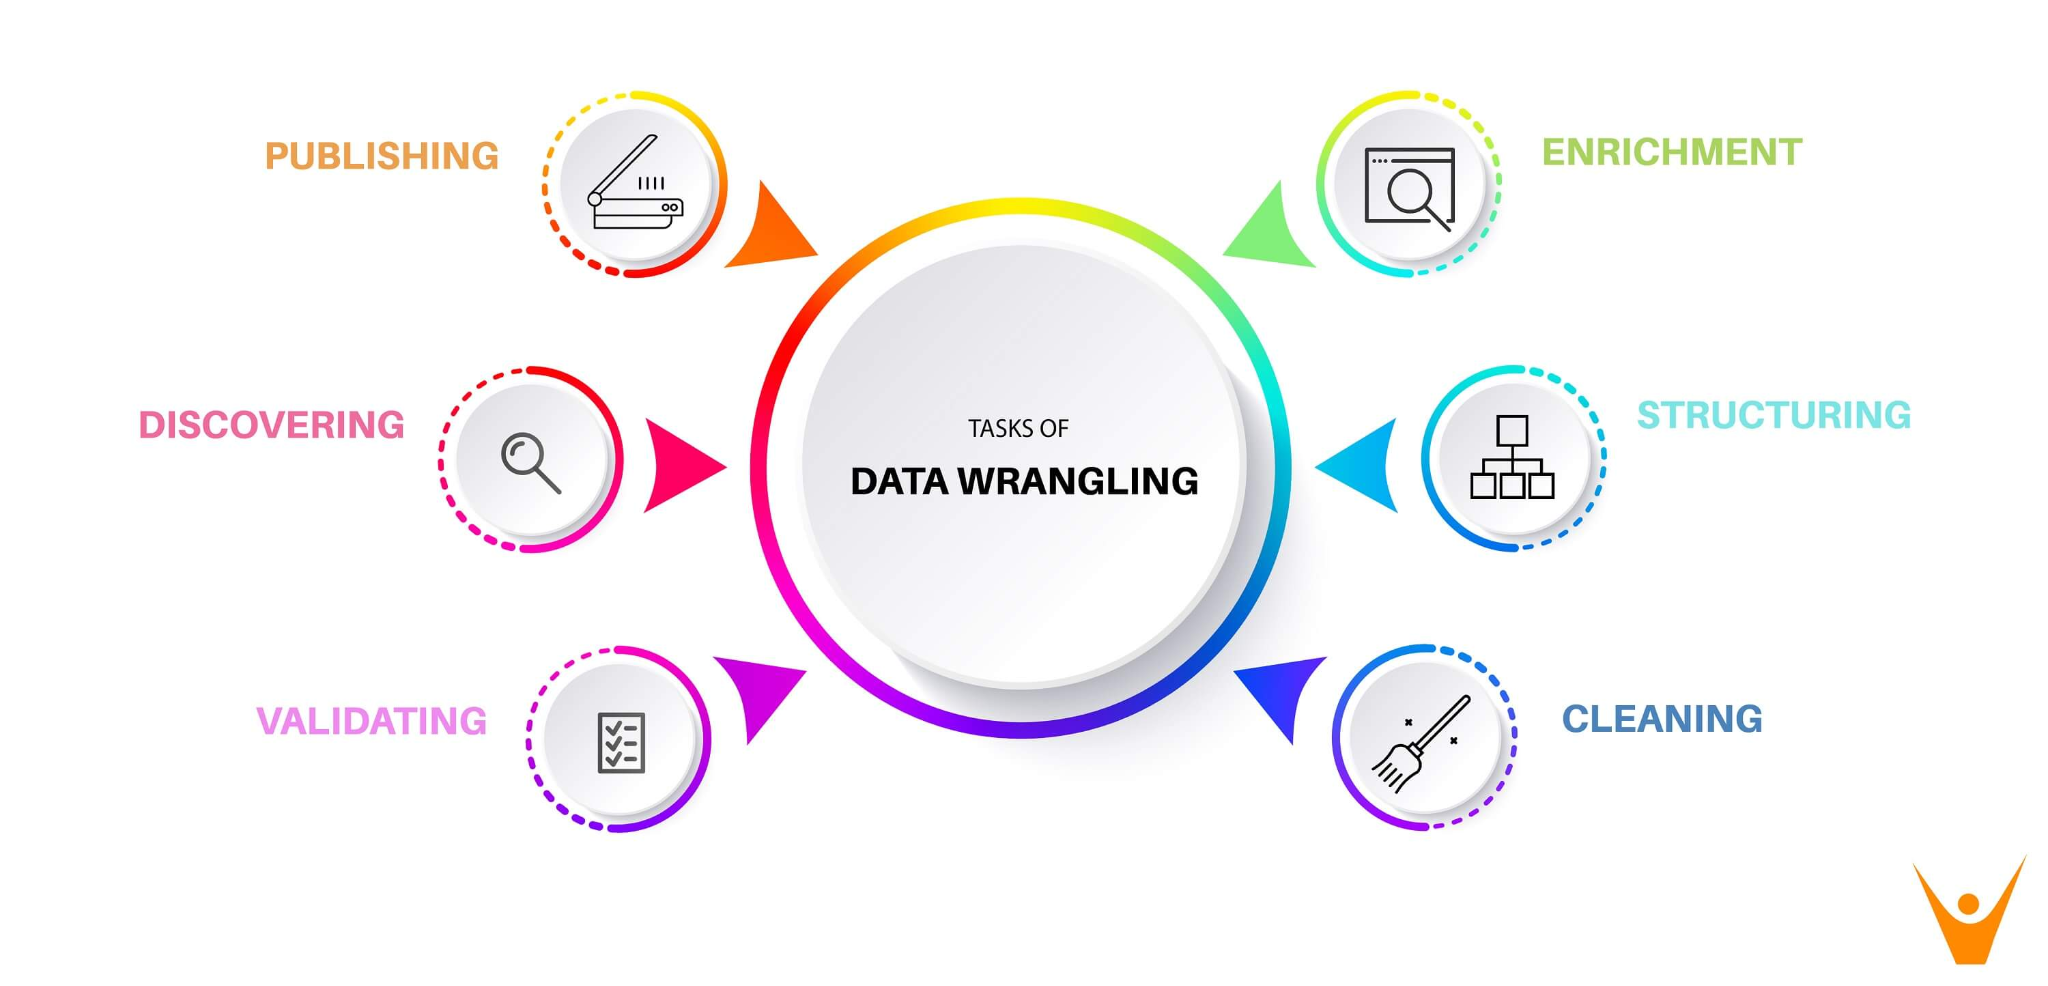

In [331]:
# Write your code to make your dataset analysis ready.

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

For categorical variable:

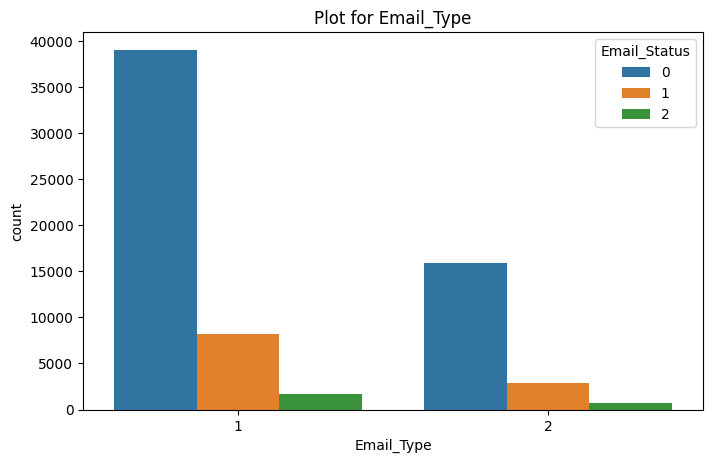

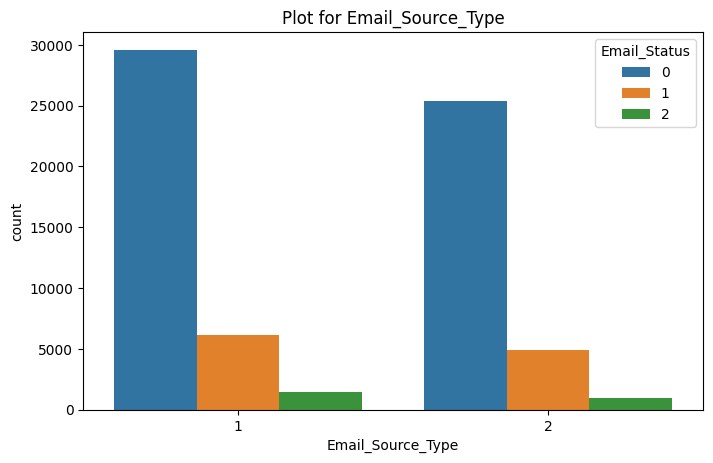

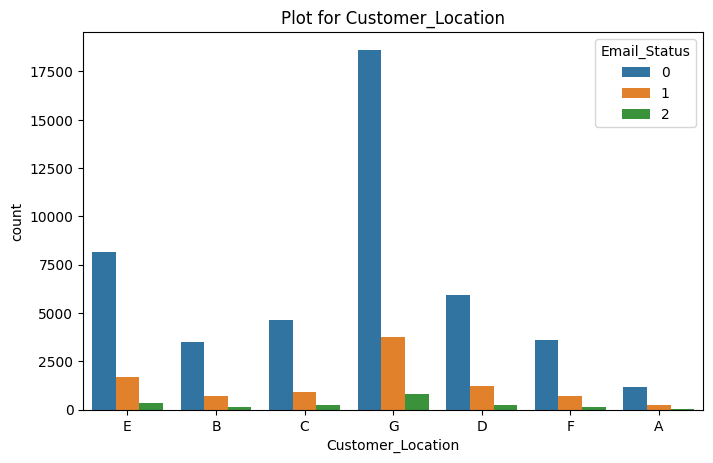

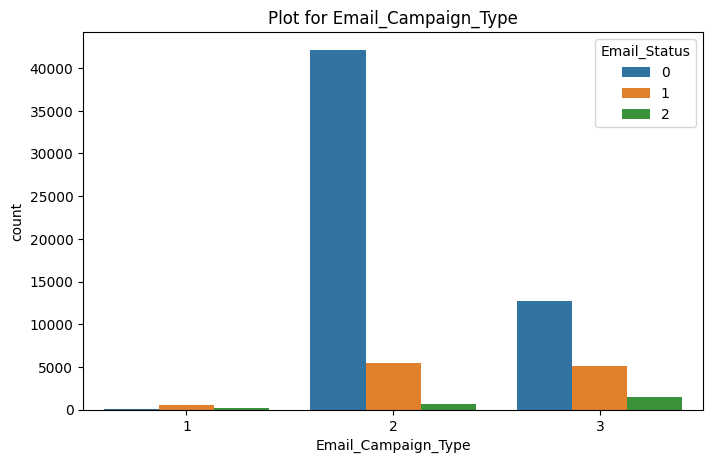

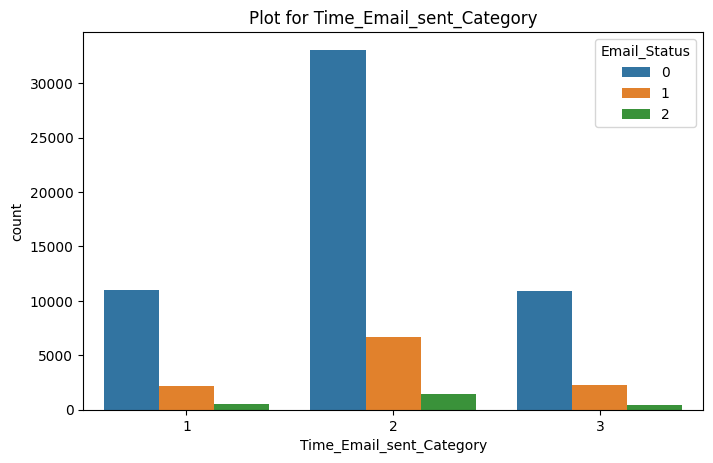

In [332]:
# Chart - 1 visualization code
#Writing a loop to plot all categorical variable.
categorical_var = ['Email_Type','Email_Source_Type','Customer_Location','Email_Campaign_Type','Time_Email_sent_Category']

for column in categorical_var:
  az = sns.countplot(x = df[column] , hue = df['Email_Status'])
  plt.title(f'Plot for {column}')
  plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Observation: 

1. Email type 1 seems to be sent in much higher number, but overall the ration of ignored, read , acknoweldge seems to be the same in graph. 
2. Email source shows very similar pattern. 
3. In the location graph again, the ratio seems quite similar, except for location g. (similar to hypothesis made earlier).
4. Campaign 1 have a very high % of email read, while campaign 3 have high % of email acknowledged. Campaign 2 have too many emails ignored. 
5. There are much more number of email send in time '2'. Assuming that 1 is morning, 2 is working hours and 3 is night. People are usually more available during working hrs to open mail, thus it makes more sense as well. 



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

**For continous variable:**

---



/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


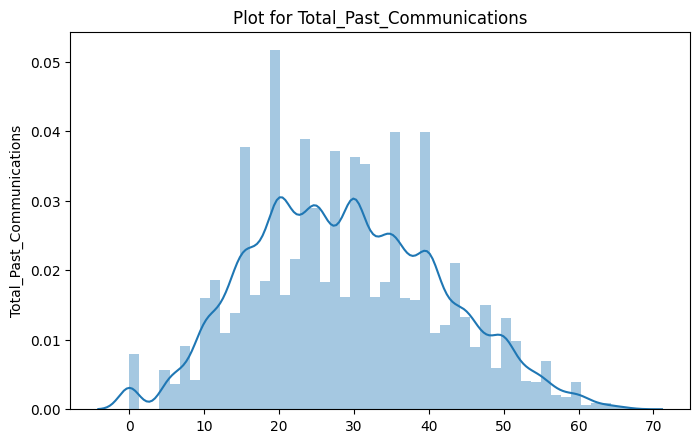

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


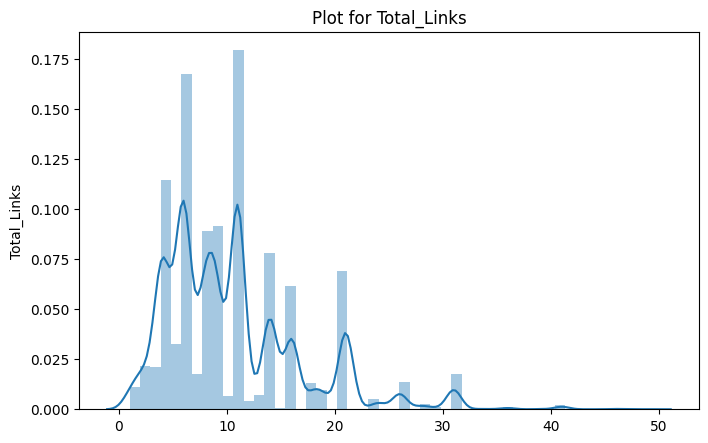

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


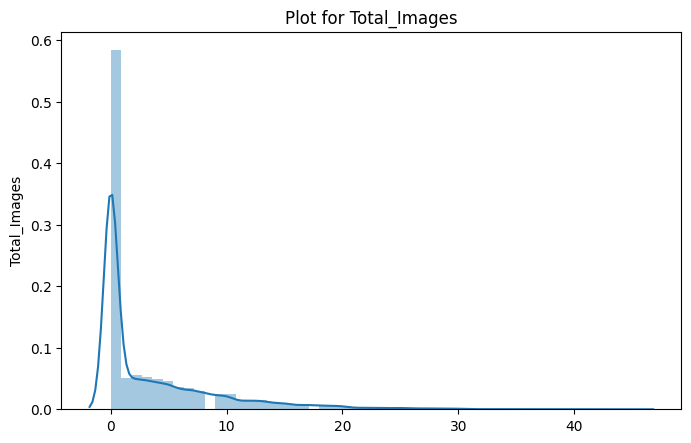

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


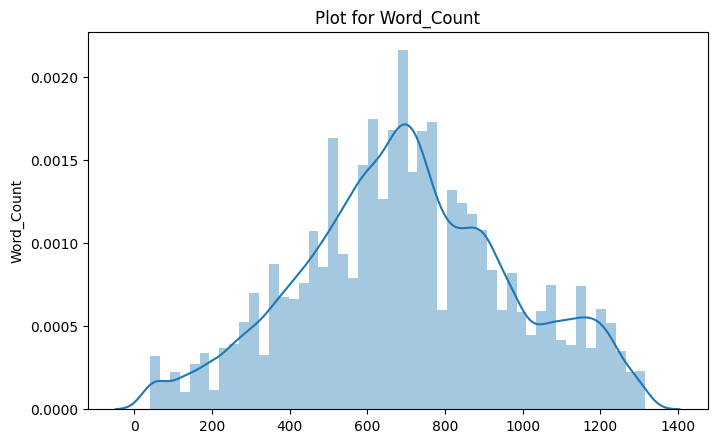

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


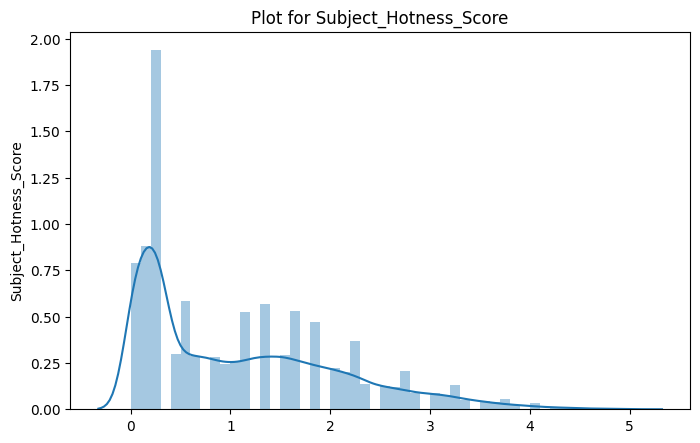

In [333]:
# Chart - 2 visualization code
#Making a loop to plot all continous variable. 

cont_var = ['Total_Past_Communications' , 'Total_Links', 'Total_Images' ,'Word_Count' , 'Subject_Hotness_Score']

for column in cont_var:
  az = sns.distplot( x = df[column] , hist = True)
  plt.title(f'Plot for {column}')
  plt.ylabel(column)
  plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

The word count have a normal looking distribution, while Subject hotness is skewed towards right. All other graphs(for continous variable)  were plotted earlier as well. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

**Box plot**

---



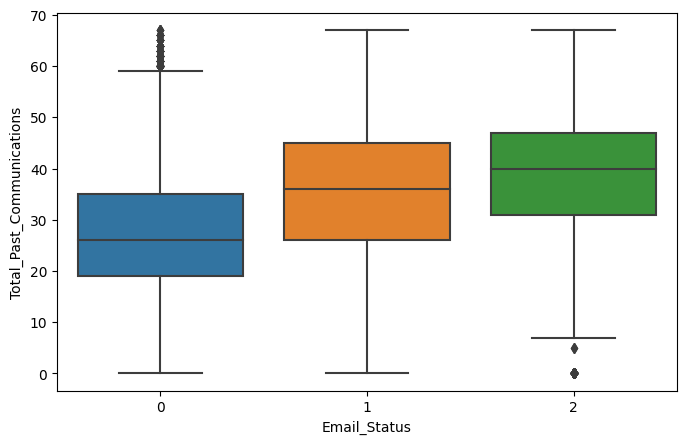

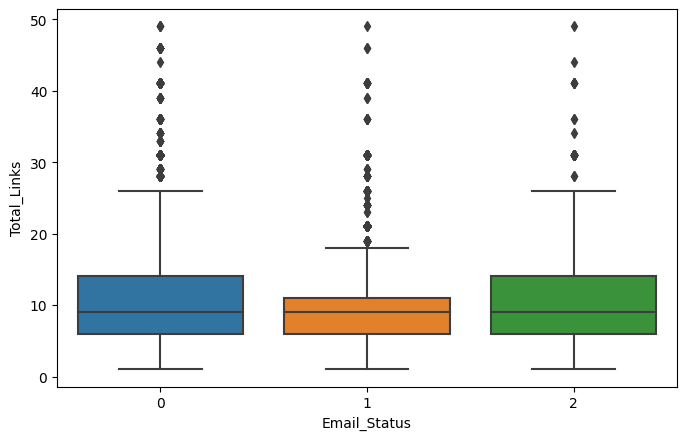

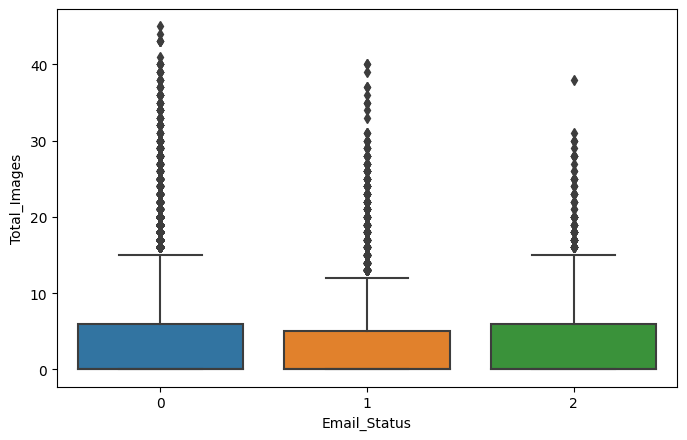

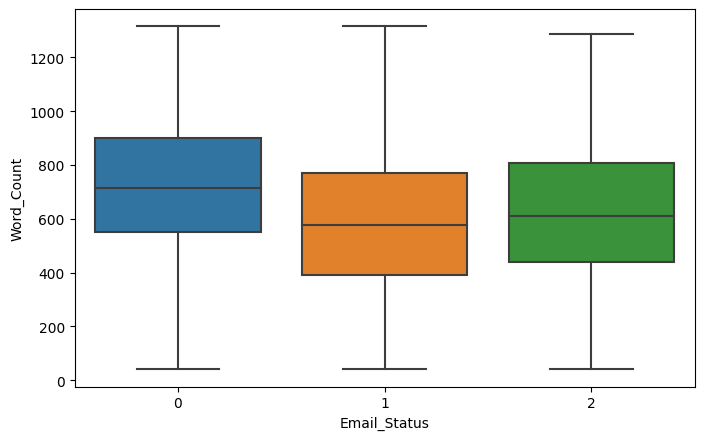

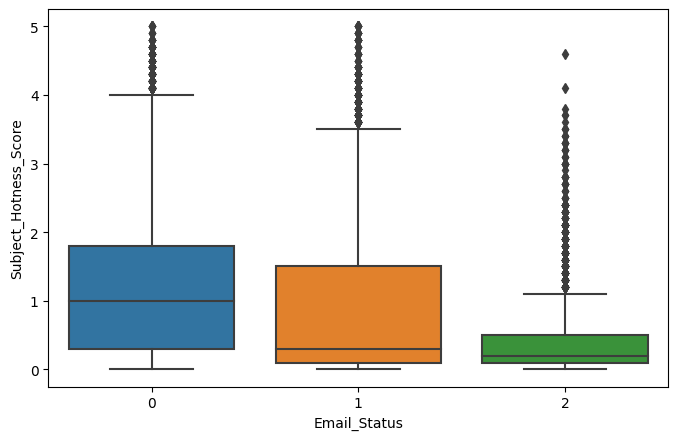

In [334]:
# Chart - 3 visualization code
# Let's look into the box plot. 

for column in cont_var:
  az = sns.boxplot(x = df['Email_Status'] , y = df[column])
  plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Observation:

1. In case when more number of total communication is there with audience, the more emails gets read and acknowledge. 
2. Mean of number of links in ignored, read and acknowledge is similar. 
3. Ignored emails have more images. 
4. Ignored emails also have higher words. 
5. '3' email status have many outliers in subject hotness score plot.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4 - Correlation Heatmap

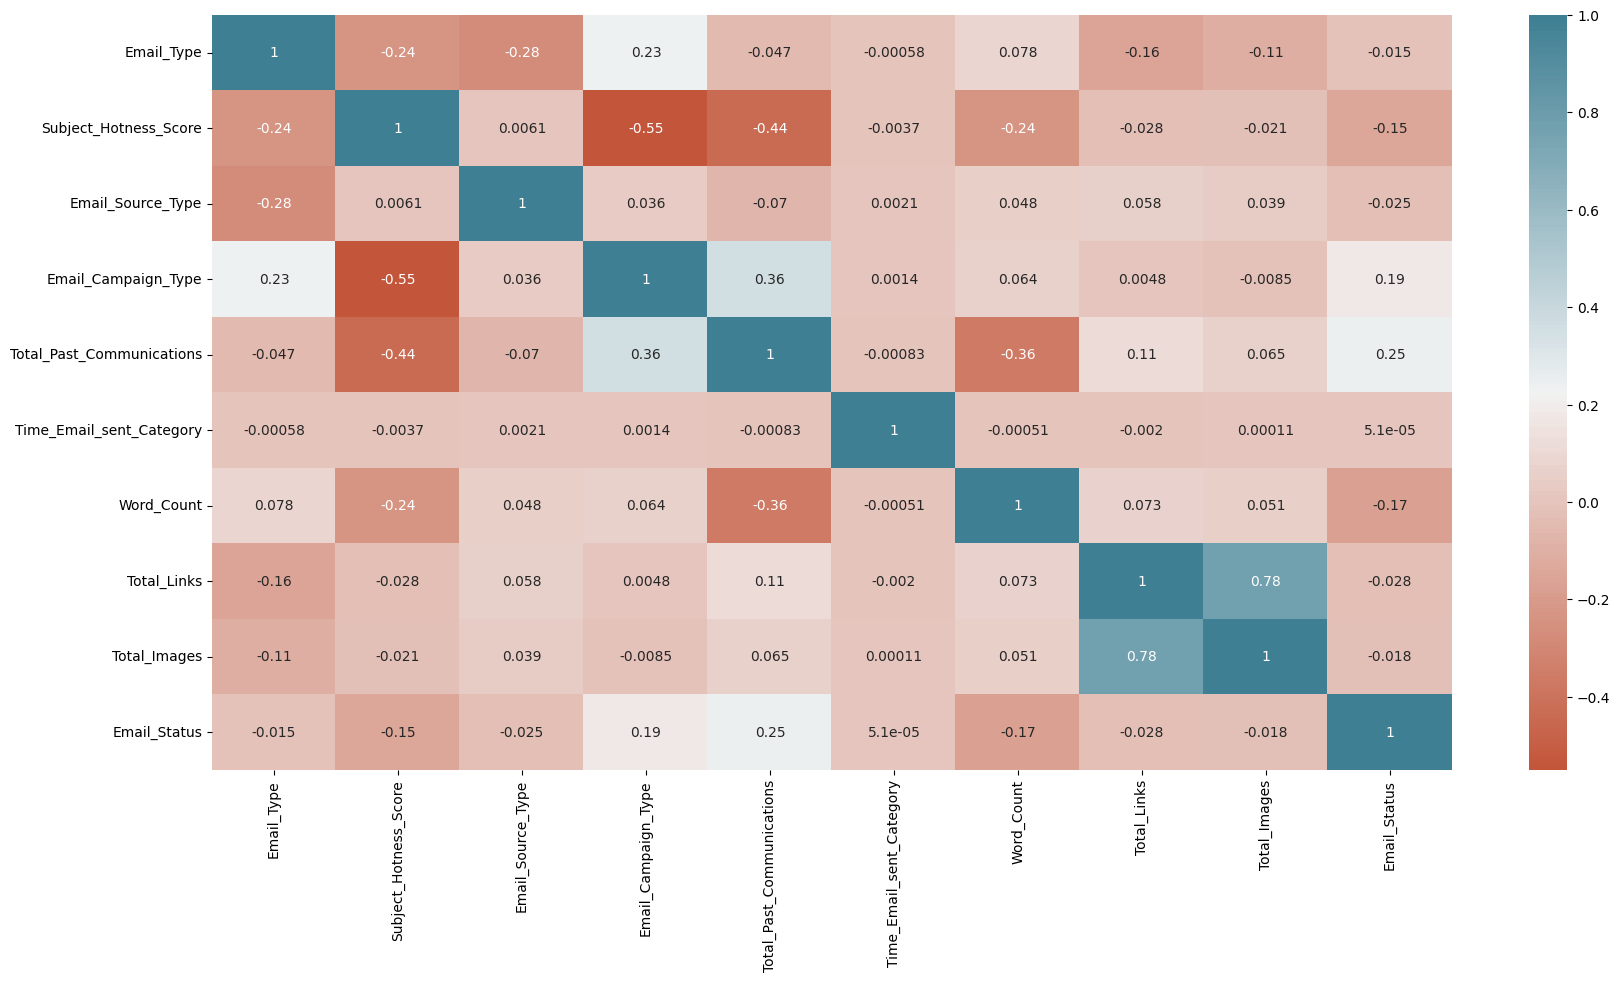

In [335]:
# Correlation Heatmap visualization code
#Plotting heat map. 

plt.figure( figsize = (20,10))
sns.heatmap(df.corr() , cmap = sns.diverging_palette(20, 220, n=200) , annot = True)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Observation:

1. Total past communication and email campaign types have positive corelation with with email status. Word count and subject hotness is -vely corelated.

2. We can also see multicollinearity in many other columns as well, marked in green. Dealing with it in next sections. 

#### Chart - 15 - Pair Plot 

In [336]:
# Pair Plot visualization code

# sns.pairplot(df)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [337]:
# Handling Missing Values & Missing Value Imputation

1. Data Cleaning
---



In [338]:
df.isnull().sum()

Email_ID                         0
Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications     6825
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                   2201
Total_Images                  1677
Email_Status                     0
dtype: int64

Handling total past communication:

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


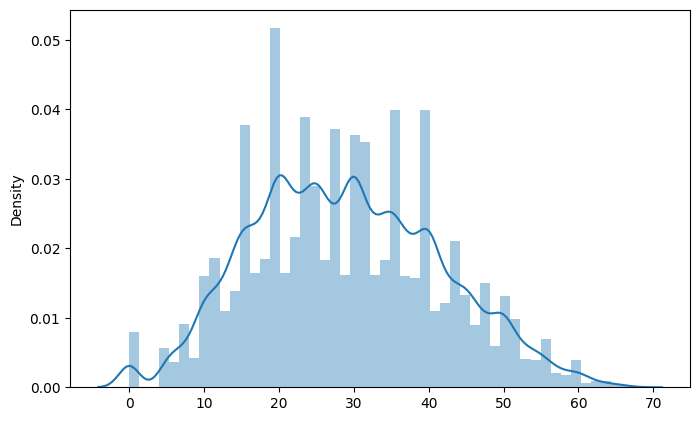

In [339]:
sns.distplot(x = df['Total_Past_Communications'] , hist = True)

The plot seems to be a normal distribution, thus deciding to fill NAN in this column with mean. 

In [340]:
df['Total_Past_Communications'].fillna(df['Total_Past_Communications'].mean() , inplace = True)

Handling total links:

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


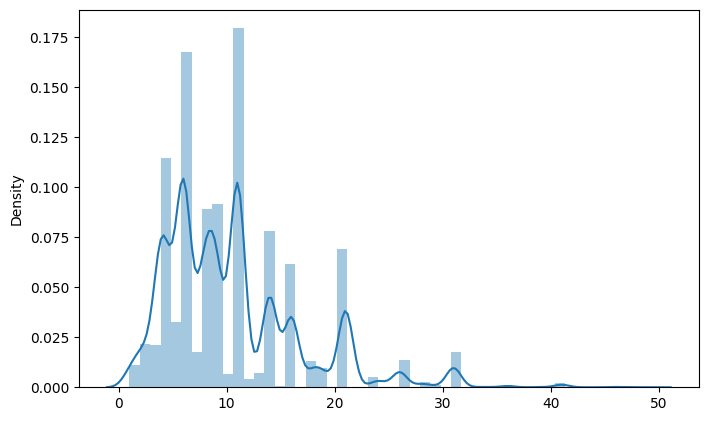

In [341]:
sns.distplot(x = df['Total_Links'] , hist = True)

The data is slighlt skewed to right, so using mode or median is better option to fill na. 

As this is a case of small numerical data, deciding to fill na with Mode. 

In [342]:
df['Total_Links'].fillna(df['Total_Links'].mode()[0] , inplace = True)

Handling total images:

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


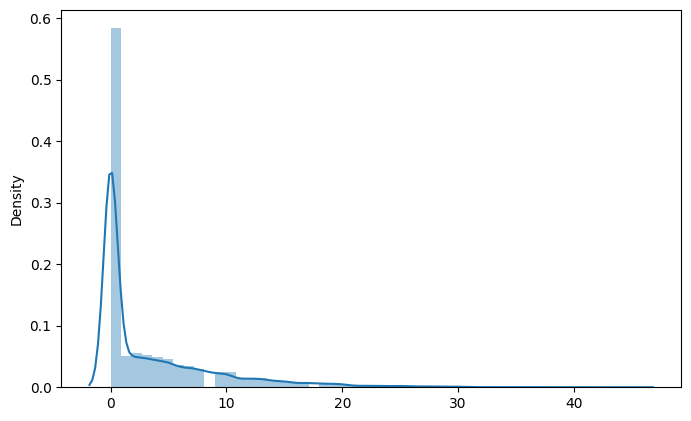

In [343]:
sns.distplot(x = df['Total_Images'] , hist = True)

This is highly skewed towards right, using mode again. 

In [344]:
df['Total_Images'].fillna(df['Total_Images'].mode()[0] , inplace = True)

In [345]:
df.isnull().sum()

Email_ID                         0
Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications        0
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                      0
Total_Images                     0
Email_Status                     0
dtype: int64

Only "Customer_Location" have null values now, I do not yet know how it will affect how classification, thus deciding to take care of it inlater stage after more anslysis.

I have **hypothesis** that it won't really affect pur analysis or prediction. If it won't, I might decide to drop the feature.

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [346]:
# Manipulate Features to minimize feature correlation and create new features

In [347]:
#Checking VIF.

#Imporitng lib for vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [348]:
#Writing a function to calulcate VIF. 

def vif_calculator(df):
  vif  =pd.DataFrame()
  vif['Columns'] = df.columns
  vif['VIF'] = [variance_inflation_factor(df.values , i) for i in range(0,df.shape[1])]
  return vif

In [349]:
#Getting vif and DataFrame

vif_df = vif_calculator(df[[i for i in df.describe().columns if i not in categorical_var + ['Email_Status']]])
vif_df

,Columns,VIF
0,Subject_Hotness_Score,1.805701
1,Total_Past_Communications,3.939214
2,Word_Count,4.065844
3,Total_Links,8.690857
4,Total_Images,3.171439


Total links have a very high vif of 8. We have seen earlier that total links and total images are highly corelated thus we can either drop it or combine. 

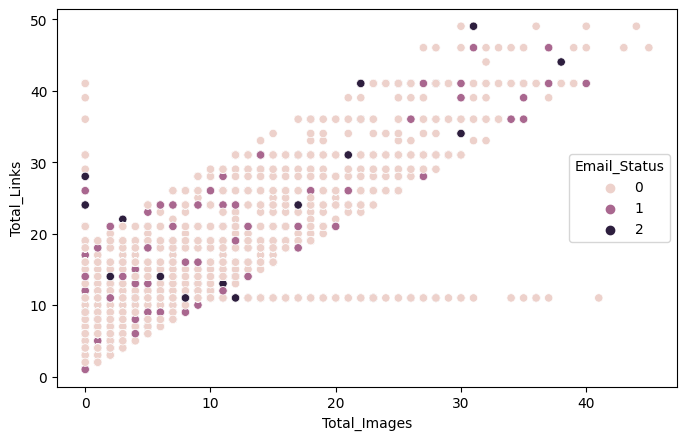

In [350]:
#Let's plot a scatter plot. 

sns.scatterplot( x = df['Total_Images'] , y = df['Total_Links'] , hue= df['Email_Status'])

This shows in general a linear relation. 

I will try to combine the, and then check vif again. 

In [351]:
df['Image_Link_Total'] = df['Total_Images'] + df['Total_Links']

df.drop(['Total_Images' , 'Total_Links'] , inplace = True , axis =1)

In [352]:
vif_df = vif_calculator(df[[i for i in df.describe().columns if i not in categorical_var + ['Email_Status']]])

vif_df

,Columns,VIF
0,Subject_Hotness_Score,1.734531
1,Total_Past_Communications,3.430879
2,Word_Count,3.687067
3,Image_Link_Total,2.629047


The vif scores are under 5 so multicollinearity is taken care of. 

**Feature manipulation**: I have added a new feature called image link total, it's done to handle multicollinearity.

### 3. Handling Outliers

In [353]:
# Handling Outliers & Outlier treatments

**Outliers:**

We have already observed that all cont. variables in the data have outliers( except word count as shown in box plot). 
As deleting data can potentially lead to information loss, I am going to see if deleting them will loose more than 5% of information or how much of outliers are in minority class. 

In [354]:
cont_var

['Total_Past_Communications',
 'Total_Links',
 'Total_Images',
 'Word_Count',
 'Subject_Hotness_Score']

In [355]:
#Removing word count (as no outliers here), total links and total imnages. Adding the new column created: Image link Total.
cont_var.remove('Word_Count')
cont_var.remove('Total_Links')
cont_var.remove('Total_Images')
cont_var.append('Image_Link_Total')


In [356]:
outliers = {}
for elem in cont_var:
  q_75, q_25 = np.percentile(df.loc[:,elem],[75,25])
  IQR_zone = q_75-q_25
  max = q_75+(1.5*IQR_zone)
  min = q_25-(1.5*IQR_zone)
  outlier_list=[]
  outlier_list=df.loc[df[elem] < min]['Email_Status'].tolist()
  outlier_list.append(df.loc[df[elem] > max]['Email_Status'].tolist()) 
  outliers[elem]={}
  for i in outlier_list[0]:
      outliers[elem][i] = outliers[elem].get(i,0) + 1
print(outliers)

{'Total_Past_Communications': {1: 56, 0: 67, 2: 13}, 'Subject_Hotness_Score': {0: 170, 1: 76, 2: 1}, 'Image_Link_Total': {0: 3061, 1: 437, 2: 122}}


In [357]:
df['Email_Status'].value_counts()

0    54941
1    11039
2     2373
Name: Email_Status, dtype: int64

In [358]:
#Calculating % of outliers in minority class. 

minority_outliers = 0  
majority_outliers = 0
for col in cont_var:
  minority_outliers += outliers[col][1]
  minority_outliers += outliers[col][2]
  majority_outliers += outliers[col][0]

total_min = df['Email_Status'].value_counts()[1] + df['Email_Status'].value_counts()[2]
total_maj = df['Email_Status'].value_counts()[0]

min_per = (minority_outliers/total_min)*100   #number of outliers in minority classes by total number minority classes
maj_per = (majority_outliers/total_maj)*100  #number of outliers in majority class by total number of majority class
total_out = ((minority_outliers+majority_outliers)/(total_min+total_maj))*100

In [359]:
#Printing results.

print(f'The percentage of outliers in minority classes is {min_per}')
print(f'The percentage of outliers in majority class is {maj_per}')
print(f'The percentage of total outliers are {total_out}')

The percentage of outliers in minority classes is 5.256486728303012
The percentage of outliers in majority class is 6.002803006861907
The percentage of total outliers are 5.856363290565154


More than 5% outliers lies in minority section thus, I won't drop it.

In [360]:
#Dropping outliers in majority.

for elem in cont_var:
  q_low = df[elem].quantile(0.01)
  q_hi  = df[elem].quantile(0.99)
  df = df.drop(df[(df[elem] > q_hi) &  (df['Email_Status']==0)].index)
  df = df.drop(df[(df[elem] < q_low) & (df['Email_Status']==0)].index)

In [361]:
df.shape

(66914, 11)

In [362]:
df['Email_Status'].value_counts()

0    53502
1    11039
2     2373
Name: Email_Status, dtype: int64

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 4. Data Scaling

**Feature Scaling**

Feature Scaling is a technique to standardize the independent features present in the data in a fixed range. It is done to prevent biased nature of machine learning algorithms towards features with greater values and scale.

In [363]:
#let's add back word count
cont_var.append('Word_Count')

In [364]:
cont_var

['Total_Past_Communications',
 'Subject_Hotness_Score',
 'Image_Link_Total',
 'Word_Count']

In [365]:
#feature scaling of numerical variables
for elem in cont_var:
  df[elem] = (df[elem] - df[elem].mean()) / (df[elem].std())

df.head(1)

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Email_Status,Image_Link_Total
0,EMA00081000034500,1,1.163386,2,E,2,0.348093,1,-0.980426,0,-0.545194


##### Which method have you used to scale you data and why?

I have applied z score here for feature scaling.

### 5. Categorical Encoding

In [366]:
# Encode your categorical columns

**One hot encoding**

Converting the categorical labels as vector.


In [367]:
#I have already seen and decided that customer location don't play any role in out analysis, thus I am dropping them from from columns that needs to be one hot encoded. 

categorical_var.remove('Customer_Location')

#Following features are going to be one hot encoded .

categorical_var

['Email_Type',
 'Email_Source_Type',
 'Email_Campaign_Type',
 'Time_Email_sent_Category']

In [368]:
#creating dummy variables
df = pd.get_dummies(df,columns=categorical_var)

In [369]:
#Email type 2 and email source type 2 columns as they are in binary, thus no need for them. It wil;l help in keeping df smaller and make model run faster. 

df.drop('Email_Type_2',axis=1,inplace=True)
df.drop('Email_Source_Type_2',axis=1,inplace=True)
df.head(1)

,Email_ID,Subject_Hotness_Score,Customer_Location,Total_Past_Communications,Word_Count,Email_Status,Image_Link_Total,Email_Type_1,Email_Source_Type_1,Email_Campaign_Type_1,Email_Campaign_Type_2,Email_Campaign_Type_3,Time_Email_sent_Category_1,Time_Email_sent_Category_2,Time_Email_sent_Category_3
0,EMA00081000034500,1.163386,E,0.348093,-0.980426,0,-0.545194,1,0,0,1,0,1,0,0


In [370]:
#shape
df.shape

(66914, 15)

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

In [371]:
#Email_Status should be the last col
columns=list(df.columns)
columns.remove('Email_Status')
columns.append('Email_Status')
df=df[columns]
df.head(1)

,Email_ID,Subject_Hotness_Score,Customer_Location,Total_Past_Communications,Word_Count,Image_Link_Total,Email_Type_1,Email_Source_Type_1,Email_Campaign_Type_1,Email_Campaign_Type_2,Email_Campaign_Type_3,Time_Email_sent_Category_1,Time_Email_sent_Category_2,Time_Email_sent_Category_3,Email_Status
0,EMA00081000034500,1.163386,E,0.348093,-0.980426,-0.545194,1,0,0,1,0,1,0,0,0


In [372]:
#As seen earlier, we have no use of Email Id and location, thus dropping them. 

df.drop(['Email_ID' , 'Customer_Location'] , axis = 1, inplace =True)
df.head(1)

,Subject_Hotness_Score,Total_Past_Communications,Word_Count,Image_Link_Total,Email_Type_1,Email_Source_Type_1,Email_Campaign_Type_1,Email_Campaign_Type_2,Email_Campaign_Type_3,Time_Email_sent_Category_1,Time_Email_sent_Category_2,Time_Email_sent_Category_3,Email_Status
0,1.163386,0.348093,-0.980426,-0.545194,1,0,0,1,0,1,0,0,0


### 8. Data Splitting

In [374]:
#Splitting the data set. 
x = df.drop('Email_Status' , axis = 1)
y = df['Email_Status']

x_train, x_test , y_train , y_test = train_test_split(x , y , test_size = 0.20 , random_state = 1 , stratify =y)

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

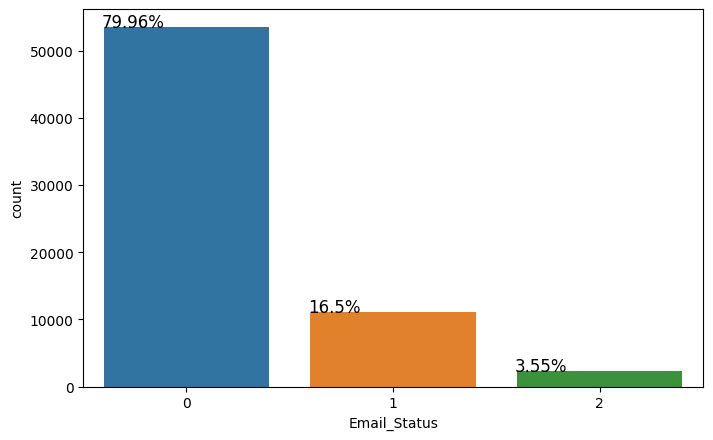

In [375]:
#First, let's see % of each class. 

ax = sns.countplot(x=df['Email_Status'])
totals = []
for i in ax.patches:
    totals.append(i.get_height())

total = sum(totals)

for i in ax.patches:
    ax.text(i.get_x() - .01, i.get_height() + .5, \
          str(round((i.get_height()/total)*100, 2))+'%', fontsize=12)
plt.show()

##### Do you think the dataset is imbalanced? Explain Why.

It's clear from above graph that there is a imbalance in data. The class inbalance favours un-opened emails, as said earlier. It's 79.96% of label. 


In [ ]:
# Handling Imbalanced Dataset (If needed)

Random Undersampling:

In [376]:
#Performing random undersampling at first. 

#Importing lib
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [377]:
ru = RandomUnderSampler(random_state = 1 , replacement = True)
x_train_ru , y_train_ru = ru.fit_resample(x_train , y_train)

In [378]:
y_train_ru.value_counts()

0    1898
1    1898
2    1898
Name: Email_Status, dtype: int64

In [379]:
len(y_train_ru)

5694

Thus, all class have same number of data now. 

SMOTE

In [380]:
#Performing SMOTE now. 

from imblearn.over_sampling import SMOTE

In [381]:
smote = SMOTE()
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

In [382]:
y_train_smote.value_counts()

0    42802
1    42802
2    42802
Name: Email_Status, dtype: int64

In [383]:
len(y_train_smote)

128406

As seen above, y_train of smote have a much bigger data set. 

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

I have used 2 methods to handle imbalance in the data:

1. Random undersampling: Random undersampling involves randomly selecting examples from the majority class to delete from the training dataset.
2. SMOTE: SMOTE (Synthetic Minority Oversampling Technique) works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

I am using both method, will later see which gives the best result.

## ***6. ML Model Implementation***

Making a function to run and compare different models. 

---

In [384]:
#Columns req. for model comparision Table. 
comparison_columns = ['Model_Name', 'Train_Accuracy', 'Train_Recall', 'Train_Precision', 'Train_F1score', 'Train_AUC' ,'Test_Accuracy', 'Test_Recall', 'Test_Precision', 'Test_F1score', 'Test_AUC']

In [385]:
#Function to evaluate model. 

def model_evaluation(model_name_RUS,model_name_SMOTE,model_var_ru, model_var_smote, x_train_ru, y_train_rus, x_train_smote, y_train_smote, X_test, y_test):


  #Prediction by random unsampling. 
  y_pred_ru_train = model_var_ru.predict(x_train_ru)
  y_pred_ru_test = model_var_ru.predict(x_test)
  #Probablity
  train_ru_proba = model_var_ru.predict_proba(x_train_ru)
  test_ru_proba = model_var_ru.predict_proba(x_test)

  #smote prediction and probability. 
  y_pred_smote_train = model_var_smote.predict(x_train_smote)
  y_pred_smote_test = model_var_smote.predict(x_test)

  train_smote_proba = model_var_smote.predict_proba(x_train_smote)
  test_smote_proba = model_var_smote.predict_proba(x_test)

  #Evaluation 
  #Accuracy RUS
  accuracy_ru_train = accuracy_score(y_train_rus,y_pred_ru_train)
  accuracy_ru_test = accuracy_score(y_test,y_pred_ru_test)
  #Accuracy SMOTE
  accuracy_smote_train = accuracy_score(y_train_smote,y_pred_smote_train)
  accuracy_smote_test = accuracy_score(y_test,y_pred_smote_test)

  #Confusion Matrix RUS
  cm_ru_train = confusion_matrix(y_train_rus,y_pred_ru_train)
  cm_ru_test = confusion_matrix(y_test,y_pred_ru_test)
  #Confusion Matrix SMOTE
  cm_smote_train = confusion_matrix(y_train_smote,y_pred_smote_train)
  cm_smote_test = confusion_matrix(y_test,y_pred_smote_test)

  #Recall RUS
  train_recall_rus = recall_score(y_train_rus,y_pred_ru_train, average='weighted')
  test_recall_rus = recall_score(y_test,y_pred_ru_test, average='weighted')
  #Recall SMOTE
  train_recall_smote = recall_score(y_train_smote,y_pred_smote_train, average='weighted')
  test_recall_smote = recall_score(y_test,y_pred_smote_test, average='weighted')

  #Precision RUS
  train_precision_rus = precision_score(y_train_rus,y_pred_ru_train, average='weighted')
  test_precision_rus = precision_score(y_test,y_pred_ru_test, average='weighted')
  #Precision SMOTE
  train_precision_smote = precision_score(y_train_smote,y_pred_smote_train, average='weighted')
  test_precision_smote = precision_score(y_test,y_pred_smote_test, average='weighted')

  #F1 Score RUS
  train_f1_rus = f1_score(y_train_rus,y_pred_ru_train, average='weighted')
  test_f1_rus = f1_score(y_test,y_pred_ru_test, average='weighted')
  #F1 Score SMOTE
  train_f1_smote = f1_score(y_train_smote,y_pred_smote_train, average='weighted')
  test_f1_smote = f1_score(y_test,y_pred_smote_test, average='weighted')

  #ROC-AUC RUS
  train_auc_rus = roc_auc_score(y_train_rus,train_ru_proba,average='weighted',multi_class = 'ovr')
  test_auc_rus = roc_auc_score(y_test,test_ru_proba,average='weighted',multi_class = 'ovr')
  #ROC-AUC SMOTE
  train_auc_smote = roc_auc_score(y_train_smote,train_smote_proba,average='weighted',multi_class = 'ovr')
  test_auc_smote = roc_auc_score(y_test,test_smote_proba,average='weighted',multi_class = 'ovr')

  #Visualising Results RUS
  print("----- Evaluation on Random Undersampled data -----" + str(model_name_RUS) + "------")
  print("--------------Test data ---------------\n")
  print("Confusion matrix \n")
  print(cm_ru_test)
  print(classification_report(y_test,y_pred_ru_test))

  #create ROC curve
  fpr = {}
  tpr = {}
  thresh ={}
  no_of_class=3
  for i in range(no_of_class):    
      fpr[i], tpr[i], thresh[i] = metrics.roc_curve(y_test, test_ru_proba[:,i], pos_label=i)
  plt.plot(fpr[0], tpr[0], linestyle='--',color='blue', label='Class 0 vs Others'+"AUC="+str(test_auc_rus))
  plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Others'+"AUC="+str(test_auc_rus))
  plt.plot(fpr[2], tpr[2], linestyle='--',color='orange', label='Class 2 vs Others'+"AUC="+str(test_auc_rus))
  plt.title('Multiclass ROC curve of ' + str(model_name_RUS))
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.legend(loc=4)
  plt.show()




  #Visualising Results SMOTE
  print("----- Evaluation on SMOTE data -------" + str(model_name_SMOTE) + '-----')
  print("---------------Test data ---------------\n")
  print("Confusion matrix \n")
  print(cm_smote_test)
  print(classification_report(y_test,y_pred_smote_test))

 
  #create ROC curve
  fpr = {}
  tpr = {}
  thresh ={}
  no_of_class=3
  for i in range(no_of_class):    
      fpr[i], tpr[i], thresh[i] = metrics.roc_curve(y_test, test_smote_proba[:,i], pos_label=i)
  plt.plot(fpr[0], tpr[0], linestyle='--',color='blue', label='Class 0 vs Others'+" AUC="+str(test_auc_smote))
  plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Others'+" AUC="+str(test_auc_smote))
  plt.plot(fpr[2], tpr[2], linestyle='--',color='orange', label='Class 2 vs Others'+" AUC="+str(test_auc_smote))
  plt.title('Multiclass ROC curve of '+ str(model_name_SMOTE))
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.legend(loc=4)
  plt.show()

  #Saving our results
  global comparison_columns
  metric_scores_rus = [model_name_RUS,accuracy_ru_train,train_recall_rus,train_precision_rus,train_f1_rus,train_auc_rus,accuracy_ru_test,test_recall_rus,test_precision_rus,test_f1_rus,test_auc_rus]
  final_dict_rus = dict(zip(comparison_columns,metric_scores_rus))

  metric_scores_smote = [model_name_SMOTE,accuracy_smote_train,train_recall_smote,train_precision_smote,train_f1_smote,train_auc_smote,accuracy_smote_test,test_recall_smote,test_precision_smote,test_f1_smote,test_auc_smote]
  final_dict_smote = dict(zip(comparison_columns,metric_scores_smote))

  dict_list = [final_dict_rus, final_dict_smote]
  return dict_list


In [386]:
#creating comparision table(function)
final_list = []
def add_eval_to_final_df(dict_list):
  global final_list
  for elem in dict_list:
    final_list.append(elem)
  global comparison_df
  comparison_df = pd.DataFrame(final_list, columns= comparison_columns)

### ML Model - 1

**Logistic Regression**

---



In [392]:
from sklearn.linear_model import LogisticRegression

In [388]:
#Modelling for random unsampling
logistic_ru = LogisticRegression(class_weight='balanced',multi_class='multinomial', solver='lbfgs')
logistic_ru.fit(x_train_ru, y_train_ru)

LogisticRegression(class_weight='balanced', multi_class='multinomial')

In [389]:
#Modelling for smote
logistic_smote = LogisticRegression(class_weight='balanced',multi_class='multinomial', solver='lbfgs')
logistic_smote.fit(x_train_smote, y_train_smote)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', multi_class='multinomial')

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

----- Evaluation on Random Undersampled data -----LogisticReg RU------
--------------Test data ---------------

Confusion matrix 

[[7440 1555 1705]
 [ 667  511 1030]
 [  94   72  309]]
              precision    recall  f1-score   support

           0       0.91      0.70      0.79     10700
           1       0.24      0.23      0.24      2208
           2       0.10      0.65      0.18       475

    accuracy                           0.62     13383
   macro avg       0.42      0.53      0.40     13383
weighted avg       0.77      0.62      0.67     13383



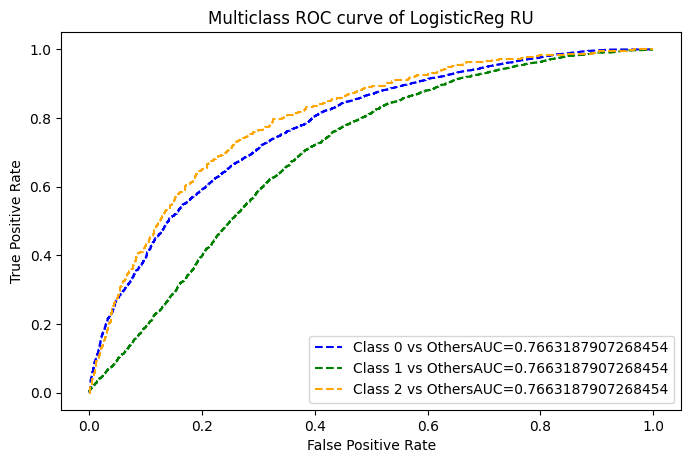

----- Evaluation on SMOTE data -------LogisticReg SMOTE-----
---------------Test data ---------------

Confusion matrix 

[[7482 1455 1763]
 [ 673  482 1053]
 [  94   64  317]]
              precision    recall  f1-score   support

           0       0.91      0.70      0.79     10700
           1       0.24      0.22      0.23      2208
           2       0.10      0.67      0.18       475

    accuracy                           0.62     13383
   macro avg       0.42      0.53      0.40     13383
weighted avg       0.77      0.62      0.68     13383



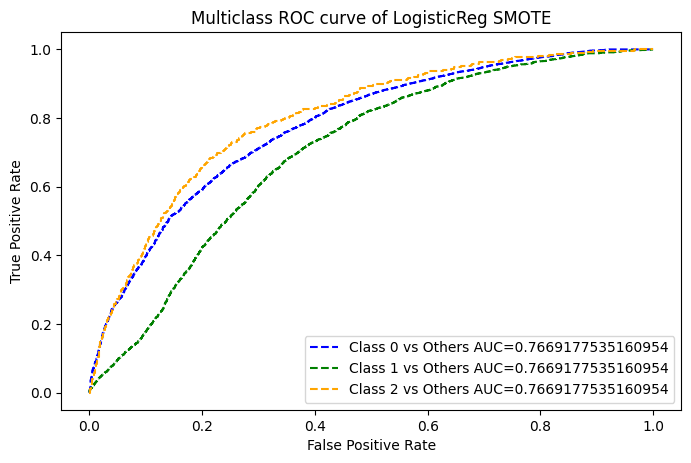

[{'Model_Name': 'LogisticReg RU',
  'Train_Accuracy': 0.5393396557780119,
  'Train_Recall': 0.5393396557780119,
  'Train_Precision': 0.5230297246569341,
  'Train_F1score': 0.5160633003178645,
  'Train_AUC': 0.7226083841049847,
  'Test_Accuracy': 0.6172009265486065,
  'Test_Recall': 0.6172009265486065,
  'Test_Precision': 0.7683671287465247,
  'Test_F1score': 0.6744624096513123,
  'Test_AUC': 0.7663187907268454},
 {'Model_Name': 'LogisticReg SMOTE',
  'Train_Accuracy': 0.5412130274286249,
  'Train_Recall': 0.5412130274286249,
  'Train_Precision': 0.5254724468134768,
  'Train_F1score': 0.5165808276172938,
  'Train_AUC': 0.7269652473151577,
  'Test_Accuracy': 0.6187700814466114,
  'Test_Recall': 0.6187700814466114,
  'Test_Precision': 0.7685142854236714,
  'Test_F1score': 0.6754052100942233,
  'Test_AUC': 0.7669177535160954}]

In [390]:
#Evaluating LR model. 

logistic_reg_eval = model_evaluation('LogisticReg RU','LogisticReg SMOTE',logistic_ru, logistic_smote, x_train_ru, y_train_ru, x_train_smote, y_train_smote, x_test, y_test)
logistic_reg_eval

In [391]:
#Adding in final DF
add_eval_to_final_df(logistic_reg_eval)

comparison_df

,Model_Name,Train_Accuracy,Train_Recall,Train_Precision,Train_F1score,Train_AUC,Test_Accuracy,Test_Recall,Test_Precision,Test_F1score,Test_AUC
0,LogisticReg RU,0.539340,0.539340,0.523030,0.516063,0.722608,0.617201,0.617201,0.768367,0.674462,0.766319
1,LogisticReg SMOTE,0.541213,0.541213,0.525472,0.516581,0.726965,0.618770,0.618770,0.768514,0.675405,0.766918


### ML Model - 2

**Decision Tree model**

---



In [393]:
from sklearn.tree import DecisionTreeClassifier

In [394]:
#For random unsampling
DT_ru = DecisionTreeClassifier()
DT_ru.fit(x_train_ru,y_train_ru)

DecisionTreeClassifier()

In [395]:
#for SMOTE
DT_smote = DecisionTreeClassifier()
DT_smote.fit(x_train_smote,y_train_smote)

DecisionTreeClassifier()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

A decision tree is a non-parametric supervised learning algorithm, which is utilized for both classification and regression tasks. It has a hierarchical, tree structure, which consists of a root node, branches, internal nodes and leaf nodes.

----- Evaluation on Random Undersampled data -----Decision Tree RU------
--------------Test data ---------------

Confusion matrix 

[[5440 3024 2236]
 [ 596  792  820]
 [  93  153  229]]
              precision    recall  f1-score   support

           0       0.89      0.51      0.65     10700
           1       0.20      0.36      0.26      2208
           2       0.07      0.48      0.12       475

    accuracy                           0.48     13383
   macro avg       0.39      0.45      0.34     13383
weighted avg       0.75      0.48      0.56     13383



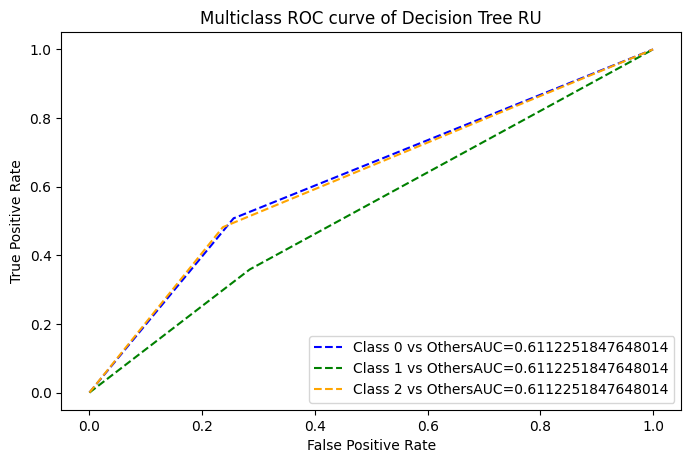

----- Evaluation on SMOTE data -------Decision Tree SMOTE-----
---------------Test data ---------------

Confusion matrix 

[[8567 1700  433]
 [1252  700  256]
 [ 218  185   72]]
              precision    recall  f1-score   support

           0       0.85      0.80      0.83     10700
           1       0.27      0.32      0.29      2208
           2       0.09      0.15      0.12       475

    accuracy                           0.70     13383
   macro avg       0.41      0.42      0.41     13383
weighted avg       0.73      0.70      0.71     13383



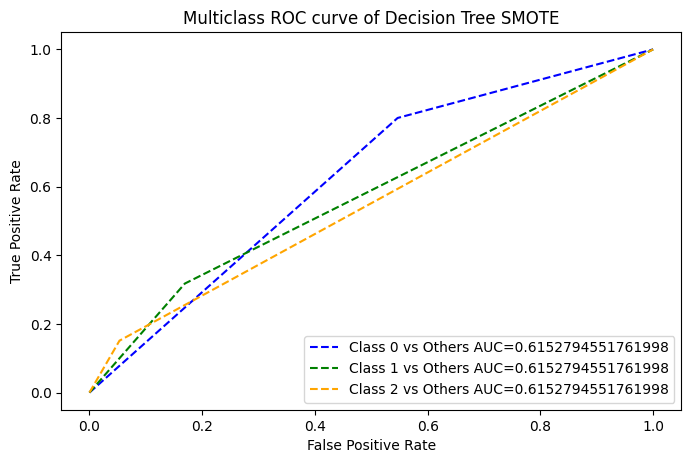

[{'Model_Name': 'Decision Tree RU',
  'Train_Accuracy': 0.9996487530734106,
  'Train_Recall': 0.9996487530734106,
  'Train_Precision': 0.9996489380375637,
  'Train_F1score': 0.9996487067470471,
  'Train_AUC': 0.9999998612037961,
  'Test_Accuracy': 0.48277665695285066,
  'Test_Recall': 0.48277665695285066,
  'Test_Precision': 0.7450389295711899,
  'Test_F1score': 0.5635246675534838,
  'Test_AUC': 0.6112251847648014},
 {'Model_Name': 'Decision Tree SMOTE',
  'Train_Accuracy': 0.9995015809230098,
  'Train_Recall': 0.9995015809230098,
  'Train_Precision': 0.9995019544776712,
  'Train_F1score': 0.9995016038528849,
  'Train_AUC': 0.9999997322614628,
  'Test_Accuracy': 0.6978255996413361,
  'Test_Recall': 0.6978255996413361,
  'Test_Precision': 0.7304602980499414,
  'Test_F1score': 0.7129330552457133,
  'Test_AUC': 0.6152794551761998}]

In [396]:
DT_eval = model_evaluation('Decision Tree RU', 'Decision Tree SMOTE', DT_ru, DT_smote, x_train_ru, y_train_ru, x_train_smote, y_train_smote, x_test, y_test)
DT_eval

In [397]:
add_eval_to_final_df(DT_eval)

In [398]:
comparison_df

,Model_Name,Train_Accuracy,Train_Recall,Train_Precision,Train_F1score,Train_AUC,Test_Accuracy,Test_Recall,Test_Precision,Test_F1score,Test_AUC
0,LogisticReg RU,0.539340,0.539340,0.523030,0.516063,0.722608,0.617201,0.617201,0.768367,0.674462,0.766319
1,LogisticReg SMOTE,0.541213,0.541213,0.525472,0.516581,0.726965,0.618770,0.618770,0.768514,0.675405,0.766918
2,Decision Tree RU,0.999649,0.999649,0.999649,0.999649,1.000000,0.482777,0.482777,0.745039,0.563525,0.611225
3,Decision Tree SMOTE,0.999502,0.999502,0.999502,0.999502,1.000000,0.697826,0.697826,0.730460,0.712933,0.615279


Observation: DT are preforming real good in training, but it's accuracy is bad in testing. Specially testing accuracy is very poor in Random unsampling. It points towards overfitting. 

### ML Model - 3

**Random Forest**

---



In [402]:
from sklearn.ensemble import RandomForestClassifier

In [403]:
#For random unsampling
rf_ru = RandomForestClassifier(random_state=42, max_depth=5, n_estimators=100, oob_score=True)
rf_ru.fit(x_train_ru,y_train_ru)

RandomForestClassifier(max_depth=5, oob_score=True, random_state=42)

In [404]:
#For SMOTE
rf_smote = RandomForestClassifier(random_state=42, max_depth=5, n_estimators=100, oob_score=True)
rf_smote.fit(x_train_smote,y_train_smote)

RandomForestClassifier(max_depth=5, oob_score=True, random_state=42)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

----- Evaluation on Random Undersampled data -----Random Forest RU------
--------------Test data ---------------

Confusion matrix 

[[7760 1307 1633]
 [ 690  508 1010]
 [ 101   66  308]]
              precision    recall  f1-score   support

           0       0.91      0.73      0.81     10700
           1       0.27      0.23      0.25      2208
           2       0.10      0.65      0.18       475

    accuracy                           0.64     13383
   macro avg       0.43      0.53      0.41     13383
weighted avg       0.77      0.64      0.69     13383



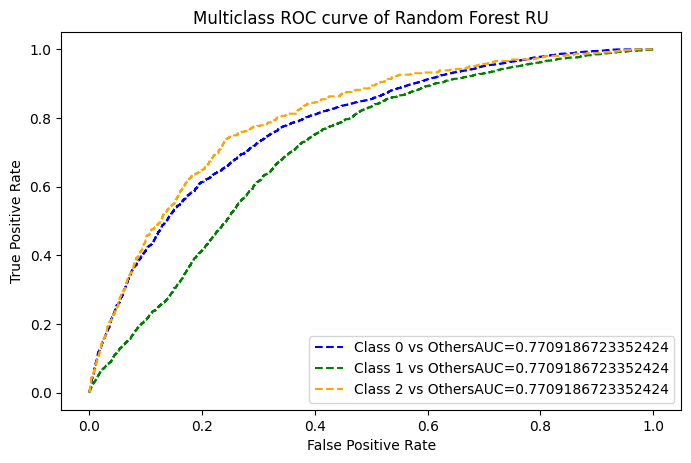

----- Evaluation on SMOTE data -------Random Forest SMOTE-----
---------------Test data ---------------

Confusion matrix 

[[8190 1212 1298]
 [ 813  553  842]
 [ 115   91  269]]
              precision    recall  f1-score   support

           0       0.90      0.77      0.83     10700
           1       0.30      0.25      0.27      2208
           2       0.11      0.57      0.19       475

    accuracy                           0.67     13383
   macro avg       0.44      0.53      0.43     13383
weighted avg       0.77      0.67      0.71     13383



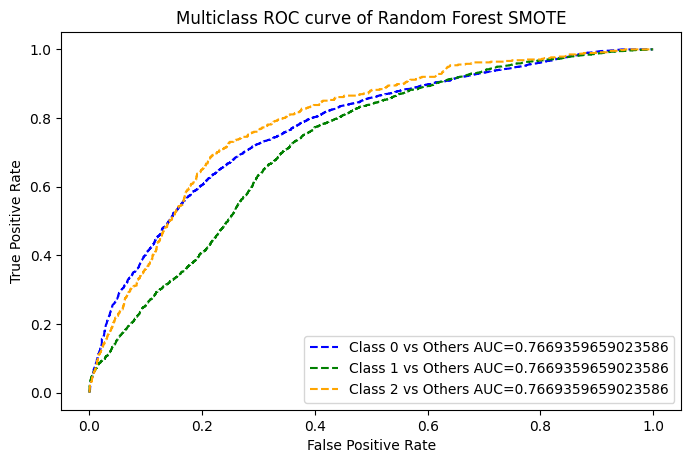

[{'Model_Name': 'Random Forest RU',
  'Train_Accuracy': 0.5574288724973656,
  'Train_Recall': 0.5574288724973656,
  'Train_Precision': 0.5476744010254289,
  'Train_F1score': 0.532074882110653,
  'Train_AUC': 0.7527013905158888,
  'Test_Accuracy': 0.6408129716804902,
  'Test_Recall': 0.6408129716804902,
  'Test_Precision': 0.7738248783305326,
  'Test_F1score': 0.6919438088858813,
  'Test_AUC': 0.7709186723352424},
 {'Model_Name': 'Random Forest SMOTE',
  'Train_Accuracy': 0.5671074560378798,
  'Train_Recall': 0.5671074560378798,
  'Train_Precision': 0.5509038704092205,
  'Train_F1score': 0.5421992219971626,
  'Train_AUC': 0.7602789698877845,
  'Test_Accuracy': 0.6733916162295449,
  'Test_Recall': 0.6733916162295449,
  'Test_Precision': 0.7712702116979891,
  'Test_F1score': 0.7123429418758725,
  'Test_AUC': 0.7669359659023586}]

In [405]:
#Evaluation of Random forest
rf_eval = model_evaluation('Random Forest RU', 'Random Forest SMOTE', rf_ru, rf_smote, x_train_ru, y_train_ru, x_train_smote, y_train_smote, x_test, y_test)
rf_eval

In [406]:
add_eval_to_final_df(rf_eval)

In [407]:
comparison_df

,Model_Name,Train_Accuracy,Train_Recall,Train_Precision,Train_F1score,Train_AUC,Test_Accuracy,Test_Recall,Test_Precision,Test_F1score,Test_AUC
0,LogisticReg RU,0.539340,0.539340,0.523030,0.516063,0.722608,0.617201,0.617201,0.768367,0.674462,0.766319
1,LogisticReg SMOTE,0.541213,0.541213,0.525472,0.516581,0.726965,0.618770,0.618770,0.768514,0.675405,0.766918
2,Decision Tree RU,0.999649,0.999649,0.999649,0.999649,1.000000,0.482777,0.482777,0.745039,0.563525,0.611225
3,Decision Tree SMOTE,0.999502,0.999502,0.999502,0.999502,1.000000,0.697826,0.697826,0.730460,0.712933,0.615279
4,Random Forest RU,0.557429,0.557429,0.547674,0.532075,0.752701,0.640813,0.640813,0.773825,0.691944,0.770919
5,Random Forest SMOTE,0.567107,0.567107,0.550904,0.542199,0.760279,0.673392,0.673392,0.771270,0.712343,0.766936


Observation: Although there is no overfitting here, but decision tree in SMOTE is performing better(slightly).

#### 2. Cross- Validation & Hyperparameter Tuning

Random forest hypertuning

---



In [408]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [409]:
#Setting different parameter
parameter = {'max_depth': [3,5,10,20],'min_samples_leaf': [5,10,20,50,100],'n_estimators': [10,25,30,50,100,200]}

In [410]:
#Running grid search to run and identify best parameter. 

grid_search = GridSearchCV(estimator=rf, param_grid=parameter, cv = 4, n_jobs=-1, verbose=1, scoring="f1_weighted")

In [411]:
#Fitting in Random unsampling
grid_search.fit(x_train_ru,y_train_ru)

Fitting 4 folds for each of 120 candidates, totalling 480 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='f1_weighted', verbose=1)

In [412]:
#Stroing best model. 
rf_tuned_ru = grid_search.best_estimator_

In [413]:
#Running grid search to run and identify best parameter. 
grid_search_smote = GridSearchCV(estimator=rf, param_grid=parameter, cv = 4, n_jobs=-1, verbose=1, scoring="f1_weighted")

In [414]:
#Fittinf for SMOTE
grid_search_smote.fit(x_train_smote,y_train_smote)

Fitting 4 folds for each of 120 candidates, totalling 480 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='f1_weighted', verbose=1)

In [415]:
#Storing best model
rf_tuned_smote = grid_search.best_estimator_

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

----- Evaluation on Random Undersampled data -----RandomF Tuned RU------
--------------Test data ---------------

Confusion matrix 

[[7168 1936 1596]
 [ 585  685  938]
 [  79  109  287]]
              precision    recall  f1-score   support

           0       0.92      0.67      0.77     10700
           1       0.25      0.31      0.28      2208
           2       0.10      0.60      0.17       475

    accuracy                           0.61     13383
   macro avg       0.42      0.53      0.41     13383
weighted avg       0.78      0.61      0.67     13383



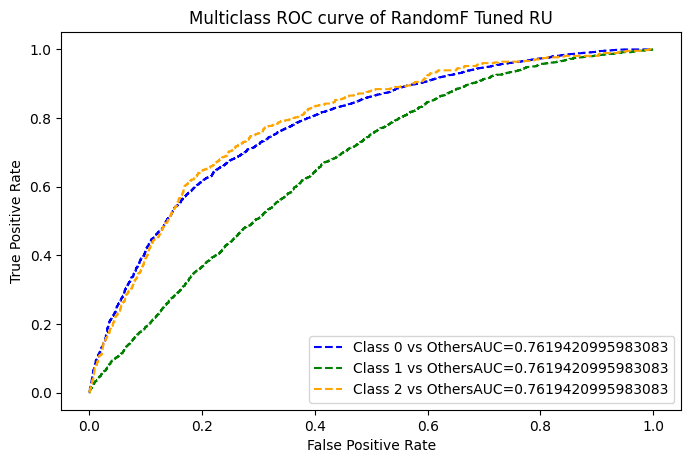

----- Evaluation on SMOTE data -------RandomF Tuned SMOTE-----
---------------Test data ---------------

Confusion matrix 

[[7168 1936 1596]
 [ 585  685  938]
 [  79  109  287]]
              precision    recall  f1-score   support

           0       0.92      0.67      0.77     10700
           1       0.25      0.31      0.28      2208
           2       0.10      0.60      0.17       475

    accuracy                           0.61     13383
   macro avg       0.42      0.53      0.41     13383
weighted avg       0.78      0.61      0.67     13383



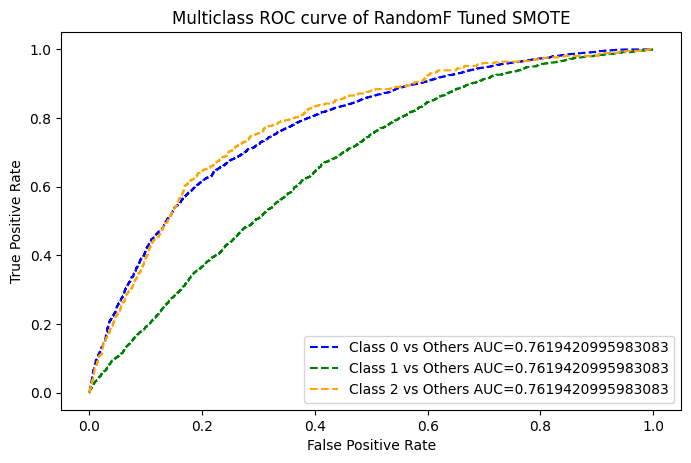

[{'Model_Name': 'RandomF Tuned RU',
  'Train_Accuracy': 0.7448191078328065,
  'Train_Recall': 0.7448191078328065,
  'Train_Precision': 0.7479887629103117,
  'Train_F1score': 0.7433583719423005,
  'Train_AUC': 0.9099446045844202,
  'Test_Accuracy': 0.6082343271314354,
  'Test_Recall': 0.6082343271314354,
  'Test_Precision': 0.7767463862242509,
  'Test_F1score': 0.6704494125136121,
  'Test_AUC': 0.7619420995983083},
 {'Model_Name': 'RandomF Tuned SMOTE',
  'Train_Accuracy': 0.5984689188978708,
  'Train_Recall': 0.5984689188978708,
  'Train_Precision': 0.5937830839837904,
  'Train_F1score': 0.5856994767590268,
  'Train_AUC': 0.7821631645163235,
  'Test_Accuracy': 0.6082343271314354,
  'Test_Recall': 0.6082343271314354,
  'Test_Precision': 0.7767463862242509,
  'Test_F1score': 0.6704494125136121,
  'Test_AUC': 0.7619420995983083}]

In [416]:
#Model evaluation
rf_tuned_eval = model_evaluation('RandomF Tuned RU', 'RandomF Tuned SMOTE', rf_tuned_ru, rf_tuned_smote,x_train_ru, y_train_ru, x_train_smote, y_train_smote, x_test, y_test)
rf_tuned_eval

In [417]:
add_eval_to_final_df(rf_tuned_eval)

In [418]:
comparison_df

,Model_Name,Train_Accuracy,Train_Recall,Train_Precision,Train_F1score,Train_AUC,Test_Accuracy,Test_Recall,Test_Precision,Test_F1score,Test_AUC
0,LogisticReg RU,0.539340,0.539340,0.523030,0.516063,0.722608,0.617201,0.617201,0.768367,0.674462,0.766319
1,LogisticReg SMOTE,0.541213,0.541213,0.525472,0.516581,0.726965,0.618770,0.618770,0.768514,0.675405,0.766918
2,Decision Tree RU,0.999649,0.999649,0.999649,0.999649,1.000000,0.482777,0.482777,0.745039,0.563525,0.611225
3,Decision Tree SMOTE,0.999502,0.999502,0.999502,0.999502,1.000000,0.697826,0.697826,0.730460,0.712933,0.615279
4,Random Forest RU,0.557429,0.557429,0.547674,0.532075,0.752701,0.640813,0.640813,0.773825,0.691944,0.770919
5,Random Forest SMOTE,0.567107,0.567107,0.550904,0.542199,0.760279,0.673392,0.673392,0.771270,0.712343,0.766936
6,RandomF Tuned RU,0.744819,0.744819,0.747989,0.743358,0.909945,0.608234,0.608234,0.776746,0.670449,0.761942
7,RandomF Tuned SMOTE,0.598469,0.598469,0.593783,0.585699,0.782163,0.608234,0.608234,0.776746,0.670449,0.761942


Answer Here.

### ML Model - 4

**XGB Boost**

---



In [419]:
#Importing lib.
from xgboost import XGBClassifier

In [420]:
#For SMOTE
xgb_smote = XGBClassifier(n_estimators=100,max_depth=12,min_samples_leaf=20,min_samples_split=30)
xgb_smote.fit(x_train_smote,y_train_smote)

XGBClassifier(max_depth=12, min_samples_leaf=20, min_samples_split=30,
              objective='multi:softprob')

In [421]:
#For RUS
xgb_rus = XGBClassifier(n_estimators=100,max_depth=12,min_samples_leaf=20,min_samples_split=30)
xgb_rus.fit(x_train_ru,y_train_ru)

XGBClassifier(max_depth=12, min_samples_leaf=20, min_samples_split=30,
              objective='multi:softprob')

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

----- Evaluation on Random Undersampled data -----XGB RUS------
--------------Test data ---------------

Confusion matrix 

[[6755 2244 1701]
 [ 597  707  904]
 [  93  118  264]]
              precision    recall  f1-score   support

           0       0.91      0.63      0.74     10700
           1       0.23      0.32      0.27      2208
           2       0.09      0.56      0.16       475

    accuracy                           0.58     13383
   macro avg       0.41      0.50      0.39     13383
weighted avg       0.77      0.58      0.65     13383



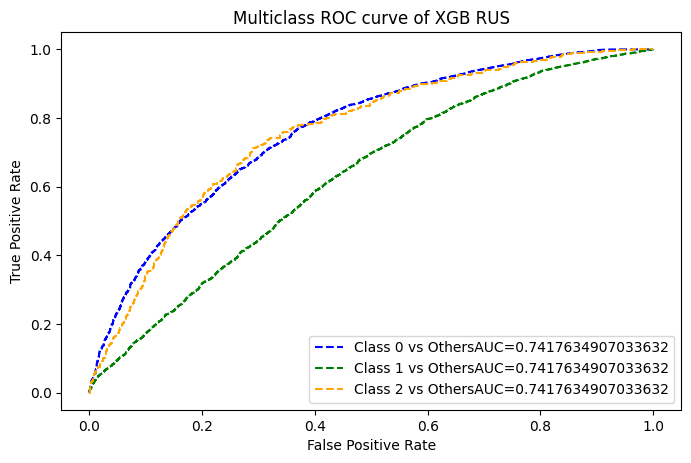

----- Evaluation on SMOTE data -------XGB SMOTE-----
---------------Test data ---------------

Confusion matrix 

[[9984  567  149]
 [1468  581  159]
 [ 269  170   36]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.89     10700
           1       0.44      0.26      0.33      2208
           2       0.10      0.08      0.09       475

    accuracy                           0.79     13383
   macro avg       0.47      0.42      0.44     13383
weighted avg       0.76      0.79      0.77     13383



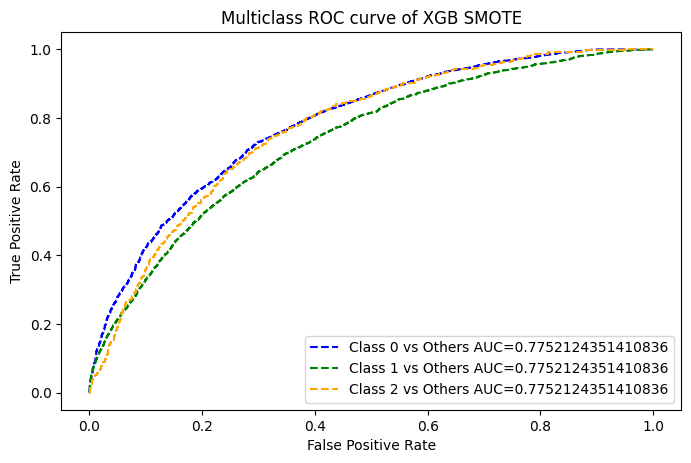

[{'Model_Name': 'XGB RUS',
  'Train_Accuracy': 0.9882332279592554,
  'Train_Recall': 0.9882332279592554,
  'Train_Precision': 0.988284327062856,
  'Train_F1score': 0.988235716495211,
  'Train_AUC': 0.999646717395754,
  'Test_Accuracy': 0.5772995591421953,
  'Test_Recall': 0.5772995591421953,
  'Test_Precision': 0.7666957578595802,
  'Test_F1score': 0.6451029632807644,
  'Test_AUC': 0.7417634907033632},
 {'Model_Name': 'XGB SMOTE',
  'Train_Accuracy': 0.9173091600080993,
  'Train_Recall': 0.9173091600080993,
  'Train_Precision': 0.9197189881676765,
  'Train_F1score': 0.9159349483203899,
  'Train_AUC': 0.9851889862768911,
  'Test_Accuracy': 0.7921243368452514,
  'Test_Recall': 0.7921243368452514,
  'Test_Precision': 0.7574793575472166,
  'Test_F1score': 0.7695405203743197,
  'Test_AUC': 0.7752124351410836}]

In [422]:
xgb_eval = model_evaluation('XGB RUS', 'XGB SMOTE',xgb_rus, xgb_smote,x_train_ru, y_train_ru, x_train_smote, y_train_smote, x_test, y_test)
xgb_eval

In [423]:
add_eval_to_final_df(xgb_eval)

In [424]:
comparison_df

,Model_Name,Train_Accuracy,Train_Recall,Train_Precision,Train_F1score,Train_AUC,Test_Accuracy,Test_Recall,Test_Precision,Test_F1score,Test_AUC
0,LogisticReg RU,0.539340,0.539340,0.523030,0.516063,0.722608,0.617201,0.617201,0.768367,0.674462,0.766319
1,LogisticReg SMOTE,0.541213,0.541213,0.525472,0.516581,0.726965,0.618770,0.618770,0.768514,0.675405,0.766918
2,Decision Tree RU,0.999649,0.999649,0.999649,0.999649,1.000000,0.482777,0.482777,0.745039,0.563525,0.611225
3,Decision Tree SMOTE,0.999502,0.999502,0.999502,0.999502,1.000000,0.697826,0.697826,0.730460,0.712933,0.615279
4,Random Forest RU,0.557429,0.557429,0.547674,0.532075,0.752701,0.640813,0.640813,0.773825,0.691944,0.770919
5,Random Forest SMOTE,0.567107,0.567107,0.550904,0.542199,0.760279,0.673392,0.673392,0.771270,0.712343,0.766936
6,RandomF Tuned RU,0.744819,0.744819,0.747989,0.743358,0.909945,0.608234,0.608234,0.776746,0.670449,0.761942
7,RandomF Tuned SMOTE,0.598469,0.598469,0.593783,0.585699,0.782163,0.608234,0.608234,0.776746,0.670449,0.761942
8,XGB RUS,0.988233,0.988233,0.988284,0.988236,0.999647,0.577300,0.577300,0.766696,0.645103,0.741763
9,XGB SMOTE,0.917309,0.917309,0.919719,0.915935,0.985189,0.792124,0.792124,0.757479,0.769541,0.775212


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***